In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd

def set_matplotlib_style():
    pd.set_option("display.max_columns", 500)
    sns.set_style("ticks")
    font = {
        "font.family": "Roboto",
        "font.size": 12,
    }
    sns.set_style(font)
    paper_rc = {
        "lines.linewidth": 3,
        "lines.markersize": 10,
    }
    sns.set_context("paper", font_scale=2, rc=paper_rc)
    current_palette = sns.color_palette()
    cmp = sns.color_palette("tab10")
    matplotlib.rcParams["pdf.fonttype"] = 42
    matplotlib.rcParams["ps.fonttype"] = 42
    
set_matplotlib_style()
full_df = pd.read_csv("../.local/a800_benchmark_4k.csv")
full_df

,M,K,num_reqs,num_models,dist,func_for_loop,func_improved,func_fp16
0,4096,4096,100,1,uniform,0.608448,0.647648,0.652512
1,4096,4096,100,1,uniform,0.571488,0.582976,0.534624
2,4096,4096,100,1,uniform,0.573504,0.574560,0.523712
3,4096,4096,100,1,uniform,0.562176,0.572480,0.541472
4,4096,4096,100,1,uniform,0.574368,0.570208,0.549408
...,...,...,...,...,...,...,...,...
75,4096,4096,100,100,zipf:1.5,15.733632,6.825024,13.842688
76,4096,4096,100,100,zipf:1.5,15.472480,6.739040,13.608096
77,4096,4096,100,100,zipf:1.5,15.503712,6.719040,13.585344
78,4096,4096,100,100,zipf:1.5,15.223488,6.639968,13.329024


In [3]:
results = []
for row in full_df.iterrows():
    results.append({
        "time": row[1]['func_for_loop'],
        "function": "for_loop",
        "num_models": row[1]['num_models'],
        "distribution": row[1]['dist']
    })
    results.append({
        "time": row[1]['func_fp16'],
        "function": "fp16",
        "num_models": row[1]['num_models'],
        "distribution": row[1]['dist']
    })
    results.append({
        "time": row[1]['func_improved'],
        "function": "Ours",
        "num_models": row[1]['num_models'],
        "distribution": row[1]['dist']
    })
new_df = pd.DataFrame(results)
new_df

,time,function,num_models,distribution
0,0.608448,for_loop,1,uniform
1,0.652512,fp16,1,uniform
2,0.647648,Ours,1,uniform
3,0.571488,for_loop,1,uniform
4,0.534624,fp16,1,uniform
...,...,...,...,...
235,13.329024,fp16,100,zipf:1.5
236,6.639968,Ours,100,zipf:1.5
237,14.111648,for_loop,100,zipf:1.5
238,12.378176,fp16,100,zipf:1.5


findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not

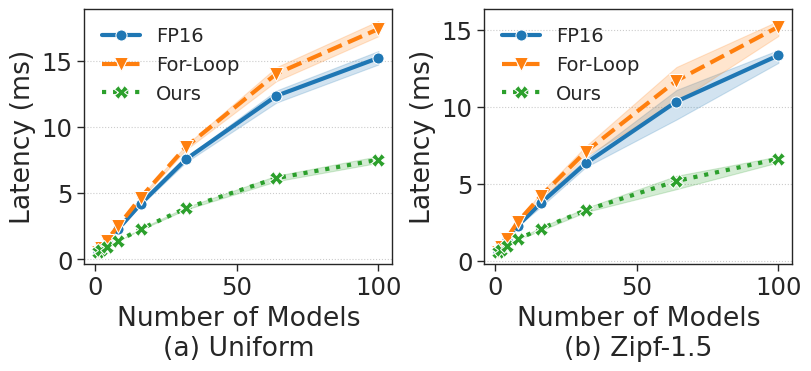

In [4]:
zipf_df = new_df[new_df["distribution"] == "zipf:1.5"]
uniform_df = new_df[new_df["distribution"] == "uniform"]

mean = zipf_df.groupby(by=["function","distribution","num_models"], as_index = False).mean()

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
grid_params=dict(width_ratios=[1, 1])
fig, (ax1, ax2) = plt.subplots(ncols=2, nrows=1, gridspec_kw=grid_params, constrained_layout=True, figsize=(8, 3.6))

policy_list = ["fp16", "for_loop", "Ours"]

sns.lineplot(x=uniform_df.num_models, y=uniform_df.time, hue=uniform_df.function, hue_order=policy_list, errorbar=('ci', 95), ax=ax1)

# ax1.set_ylim(0, 3)
ax1.lines[0].set_marker("o")
ax1.lines[1].set_marker("v")
ax1.lines[2].set_marker("X")
ax1.lines[0].set_markersize(8)
ax1.lines[1].set_markersize(10)
ax1.lines[2].set_markersize(10)
ax1.lines[0].set_linestyle("-")
ax1.lines[1].set_linestyle("--")
ax1.lines[2].set_linestyle(":")
# ax1.set_xticks([0.5, 1.0, 1.5, 2.0, 2.5])
# ax1.set_xticklabels(["0.5x", "1.0x", "1.5x", "2.0x", "2.5x"])

# ax1.set_yticks([0, 1, 2, 3])
ax1.set_xlabel("Number of Models\n(a) Uniform")
ax1.set_ylabel("Latency (ms)")

ax1.grid(axis="y", linestyle=":")
ax1.legend(handles=ax1.lines, labels=["FP16", "For-Loop", "Ours"],loc=0, frameon=False, fontsize=14)

sns.lineplot(x=zipf_df.num_models, y=zipf_df.time, hue=zipf_df.function, hue_order=policy_list, errorbar=('ci', 95), ax=ax2)

# ax1.set_ylim(0, 3)
ax2.lines[0].set_marker("o")
ax2.lines[1].set_marker("v")
ax2.lines[2].set_marker("X")
ax2.lines[0].set_markersize(8)
ax2.lines[1].set_markersize(10)
ax2.lines[2].set_markersize(10)
ax2.lines[0].set_linestyle("-")
ax2.lines[1].set_linestyle("--")
ax2.lines[2].set_linestyle(":")
# ax2.set_xticks([0.5, 1.0, 1.5, 2.0, 2.5])
# ax2.set_xticklabels(["0.5x", "1.0x", "1.5x", "2.0x", "2.5x"])
ax2.set_xlabel("Number of Models\n(b) Zipf-1.5")
ax2.set_ylabel("Latency (ms)")
ax2.grid(axis="y", linestyle=":")
ax2.legend(handles=ax1.lines, labels=["FP16", "For-Loop", "Ours"],loc=0, frameon=False, fontsize=14)

fig.savefig("../.local/kernel_benchmark.pdf", bbox_inches='tight')
